In [1]:
# Logistic Regression

In [4]:
#import all libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import preprocessing 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import log_loss, roc_auc_score, recall_score, precision_score, average_precision_score, f1_score, classification_report, accuracy_score, plot_roc_curve, plot_precision_recall_curve, plot_confusion_matrix


In [5]:
# Load Cryotherapy Data

cryo = pd.read_csv("../../Data/Cryotherapy.csv", sep = ',', header = 0)

In [6]:
cryo.head()

,sex,age,Time,Number_of_Warts,Type,Area,Result_of_Treatment
0,1,35,12.00,5,1,100,0
1,1,29,7.00,5,1,96,1
2,1,50,8.00,1,3,132,0
3,1,32,11.75,7,3,750,0
4,1,67,9.25,1,1,42,0


In [8]:
# Describe Cryotherapy Data

cryo.describe().T

,count,mean,std,min,25%,50%,75%,max
sex,90.0,1.477778,0.502304,1.00,1.0000,1.0,2.0000,2.0
age,90.0,28.600000,13.360852,15.00,18.0000,25.5,35.0000,67.0
Time,90.0,7.666667,3.406661,0.25,4.5625,8.5,10.6875,12.0
Number_of_Warts,90.0,5.511111,3.567155,1.00,2.0000,5.0,8.0000,12.0
Type,90.0,1.700000,0.905042,1.00,1.0000,1.0,3.0000,3.0
Area,90.0,85.833333,131.733153,4.00,20.0000,70.0,100.0000,750.0
Result_of_Treatment,90.0,0.533333,0.501683,0.00,0.0000,1.0,1.0000,1.0


In [10]:
# Check for missing data 
# Remember we can use the isnull(), sum(), and sort_values() functions)
total = cryo.isnull().sum().sort_values(ascending=False)
# Your Code goes here
total

sex                    0
age                    0
Time                   0
Number_of_Warts        0
Type                   0
Area                   0
Result_of_Treatment    0
dtype: int64

In [11]:
print(cryo.shape)

(90, 7)


In [13]:
# Drop sensitive colums
# Remember to include the axis and if you want columns to be dropped in place or not
cryo.drop(cryo.columns[[0,1,2]],axis=1,inplace=True)
# Your code goes here


In [14]:
# View dataset
cryo.head()

,Number_of_Warts,Type,Area,Result_of_Treatment
0,5,1,100,0
1,5,1,96,1
2,1,3,132,0
3,7,3,750,0
4,1,1,42,0


In [17]:
# Creating Array of Features
X = cryo.iloc[:,:3]
X.head()

,Number_of_Warts,Type,Area
0,5,1,100
1,5,1,96
2,1,3,132
3,7,3,750
4,1,1,42


In [18]:
# Create Target Array
Y = cryo.iloc[:,-1]
Y.head()

0    0
1    1
2    0
3    0
4    0
Name: Result_of_Treatment, dtype: int64

In [22]:
# Split data into training and testing sets
# Remember to set the proportion and random state
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.40, random_state = 23)
#Your code goes here


In [26]:
# Create Logistic Regression Classifier
classifier = LogisticRegression(solver='lbfgs',random_state=234)


LogisticRegression(random_state=234)

In [29]:
# Fit Classifier on Cryotherapy Data
classifier.fit(X_train , Y_train)
# Your code goes here


LogisticRegression(random_state=234)

In [30]:
# Testing Classifier with our remaining data
predicted_y = classifier.predict(X_test)
print(predicted_y)

[1 0 1 0 1 0 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0]


In [31]:
# View patients who will probably respond positively to cryotherapy

for x in range(len(predicted_y)):
    if (predicted_y[x] == 1):
        print(x)

0
2
4
6
8
10
11
13
14
15
16
17
19
20
22
23
24
26
27
29
30
31
32
33
34


In [32]:
print('Accuracy: {:.2f}'.format(classifier.score(X_test, Y_test)))

Accuracy: 0.69


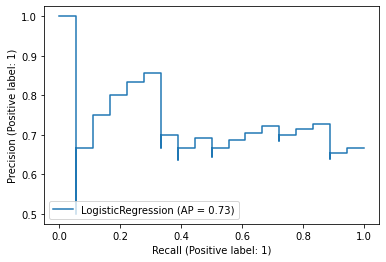

In [34]:
plot_precision_recall_curve(classifier, X_test, Y_test)


In [36]:
# View Metrics
print('Accuracy = {:.5f}'.format(accuracy_score(Y_test, predicted_y)))
print('Precision = {:.5f}'.format(precision_score(Y_test, predicted_y)))
print('Recall = {:.5f}'.format(recall_score(Y_test, predicted_y)))
print('F1 score = {:.5f}'.format(f1_score(Y_test, predicted_y)))

print('\nClassification Report')

# Print Classification report
# Your code goes here


Accuracy = 0.69444
Precision = 0.64000
Recall = 0.88889
F1 score = 0.74419

Classification Report


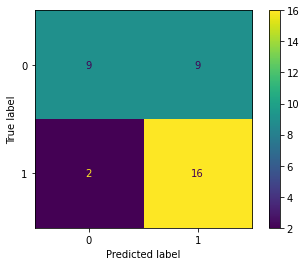

In [37]:
# Print Confusion Matrix

plot_confusion_matrix(classifier, X_test, Y_test)